<a href="https://colab.research.google.com/github/michbric/lab-reports/blob/main/Fractal_GeometryFinal2024_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Chaos Game


Strange New Science of Chaos https://www.youtube.com/watch?v=wdrO0Nwztrg


Fern Functions https://www.youtube.com/watch?v=xoXe0AljUMA

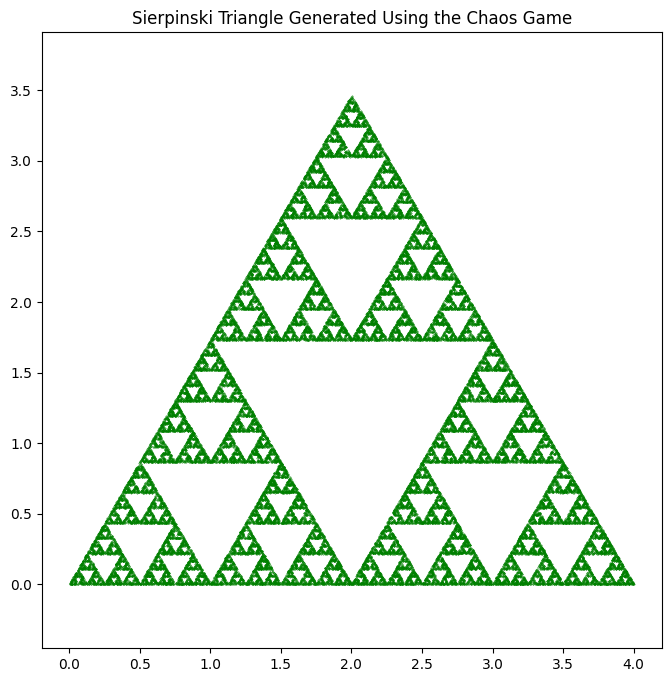

In [1]:
import matplotlib.pyplot as plt
from random import random, randint
import numpy as np

def midpoint(P, Q): # Calculates the midpoint between two points in a 2D plane.
    return (0.5*(P[0] + Q[0]), 0.5*(P[1] + Q[1])) # P (tuple): A tuple representing the coordinates of the first point (x,y). Q (tuple): A tuple representing the coordinates of the second point (x,y)
# tuple: A tuple representing the coordinates of the midnight (x,y)
vertices = [(0, 0), (2, 2*np.sqrt(3)), (4, 0)] # Define the vertices of the initial equilateral triangle.
iterates = 10000 # Set the number of iterations for generating points.
x, y = [0]*iterates, [0]*iterates # Initialize empty listd to store the x and y coordinates of the generated points.
x[0], y[0] = random(), random() # Set the initial point randomly within the 2D plane.

for i in range(1, iterates): # Iterate to generate the points of the Sierpinski triangle using the chaos game algorithm.

    k = randint(0, 2) # Randomly select one of the three vertices,

    x[i], y[i] = midpoint( vertices[k], (x[i-1], y[i-1]) ) # Calculate the midpoint between the randomly selected vertex and the previous point.

plt.figure(figsize=(8, 8)) # Create a new figure for the plot with a specified size.
plt.scatter(x, y, color = 'g', s=0.1) # Scatter plot the generated points with blue color and small marker size.
plt.title('My Modified Sierpinski Triangle') # Set the title of the plot.
plt.axis('equal')  # Ensure aspect ratio is equal for an equilateral triangle
plt.show() # Display the generated plot.

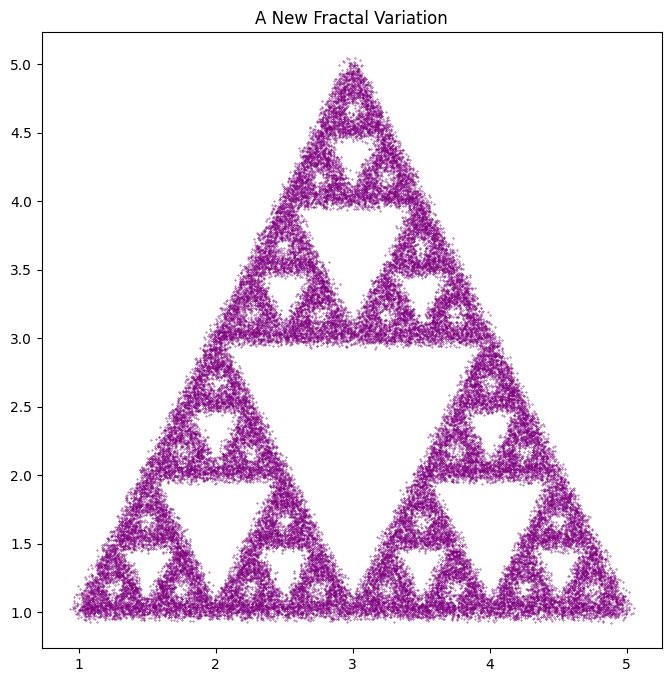

In [2]:
import matplotlib.pyplot as plt
from random import random, randint
import numpy as np

def modified_point(P, Q):
    offset_factor = 0.1 # Adjust for different effects
    mid_x = 0.5 * (P[0] + Q[0])
    mid_y = 0.5 * (P[1] + Q[1])
    # Introduce a random offset
    offset_x = random() * offset_factor - offset_factor / 2
    offset_y = random() * offset_factor - offset_factor / 2
    return (mid_x + offset_x, mid_y + offset_y)

new_vertices = [(1, 1), (5, 1), (3, 5)] # A different triangle
new_iterates = 50000
new_x, new_y = [0]*new_iterates, [0]*new_iterates
new_x[0], new_y[0] = random() * 6, random() * 6 # Start within a reasonable range

for i in range(1, new_iterates):
    k = randint(0, 2)
    new_x[i], new_y[i] = modified_point(new_vertices[k], (new_x[i-1], new_y[i-1]))

plt.figure(figsize=(8, 8))
plt.scatter(new_x, new_y, color='purple', s=0.1)
plt.title('A New Fractal Variation')
plt.axis('equal')
plt.show()

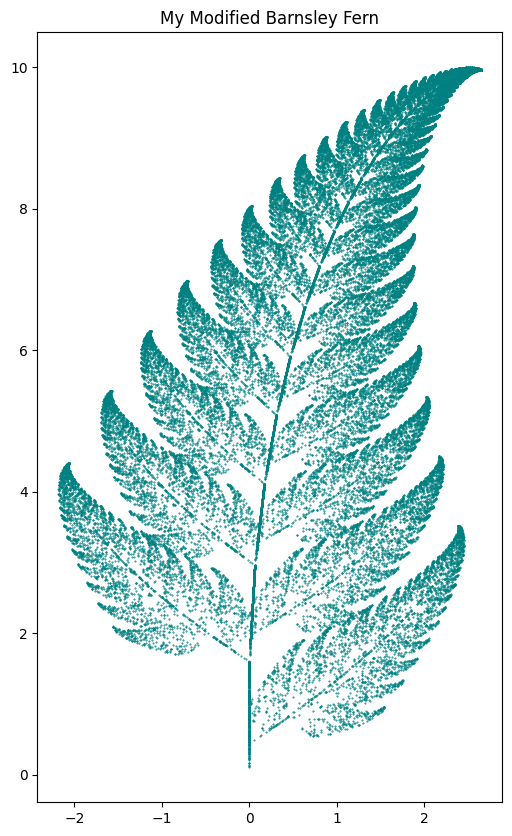

In [3]:
import random
import matplotlib.pyplot as plt

# Define the transformation functions
def f1(x, y): #Transformation 1: Maps a point toward the base stem of the fern. It significantly scales down both x and y coordinates, effectively compressing the point towards the origin with a slight vertical scaling.
    x = 0 # tuple: The new x and y coordinates after the transformation.
    y = 0.16 * y
    return x, y

def f2(x, y): # Transformation 2: The primary transformation responsible for creating the larger leaflets of the fern. It involves scaling, rotation, and translation of the point.
    x_new = 0.85 * x + 0.04 * y
    y_new = -0.04 * x + 0.85 * y + 1.6
    return x_new, y_new

def f3(x, y): # Transformation 3: Contributes to the smaller leaflets on the left side of the fern. It involves scaling, rotation (more significant than f2) and translation.
    x_new = 0.2 * x - 0.26 * y
    y_new = 0.23 * x + 0.22 * y + 1.6
    return x_new, y_new

def f4(x, y): # Transformation 4: Contributes to the smaller leaflets on the right side of the fern. It also involes scaling, rotation, and translation.
    x_new = -0.15 * x + 0.28 * y
    y_new = 0.26 * x + 0.24 * y + 0.44
    return x_new, y_new

# Probabilities for each function: These probabilities determine how often
# each transformation is applied during the iteration process. The probabilities
# sum up to 1. The higher probability of f2 (0.85) is what causes the overall
# fern shape to emerge.

probabilities = [0.01, 0.85, 0.07, 0.07]

# Barnsley Fern function: This function iteratively applies one of the four
# defined transformations to a starting point (initially (0, 0)) based on the
# given probabilities. The resulting points are collected to form the fern.
def barnsley_fern(iterations): # Generates a set of points that form the Barnsley Fern fractal.
    x, y = 0, 0 # Initialize the starting point
    points = [] # List to store the generated points

    for _ in range(iterations):
        rand = random.random() # Apply the transformations based on the defined probabilities.
                              # The random number determines which transformation is chosen.
        if rand   < sum(probabilities[:1]): # Probability of f1
            x, y = f1(x, y)
        elif rand < sum(probabilities[:2]): # Probability of f2
            x, y = f2(x, y)
        elif rand < sum(probabilities[:3]): # Probability of f3
            x, y = f3(x, y)
        else:                               # Probability of f4
            x, y = f4(x, y)

        points.append((x, y)) # Add the new point to the list

    return points

# Generate points for the Barnsley Fern by calling the barnsley_fern function
# With a specified number of iterations. A higher number of iterations will
# result in a denser and mpre detailed rendering of the fern.
iterations = 50000
fern_points = barnsley_fern(iterations)

# Plot the Barnsley Fern using matplotlib. The generated points are scattered
# on a 2D plot to visualize the fractal.
x_vals, y_vals = zip(*fern_points) # Separate the x and y coordinates from the list of points.
plt.figure(figsize=(6, 10)) # Create a new figure with a specified size (width, height)
plt.scatter(x_vals, y_vals, s=0.2, color='teal') # Create a scatter plot of the points with small green markers
plt.title('My Modified Barnsley Fern') # Set the title of the plot
plt.show()                # Display the generated plot


# Part 2: L-Systems

In [9]:
!wget -O turtle_setup.py 'https://raw.githubusercontent.com/williamedwardhahn/fractal25/refs/heads/main/turtle_setup.py'
from turtle_setup import *

--2025-04-27 21:19:05--  https://raw.githubusercontent.com/williamedwardhahn/fractal25/refs/heads/main/turtle_setup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13274 (13K) [text/plain]
Saving to: ‘turtle_setup.py’

turtle_setup.py     100%[===================>]  12.96K  --.-KB/s    in 0.001s  

2025-04-27 21:19:05 (12.2 MB/s) - ‘turtle_setup.py’ saved [13274/13274]



In [12]:
# Initialize the turtle graphics environment. This funtion is assumed to
# set up the drawing canvas ad prepare the turtle for drawing
initializeTurtle()
# Make the tutle cursor visible on the screen. This allows the user to see
# the turtle as it draws.
showturtle()

# Function to apply L-system rules: This function takes a character and a set
# of rules as input. It checks if the character existes as a key in the rules
# dictionary. If it does, it returns the corresponding replacement string;
# otherwise, it returns the original character.
def apply_rule(char, rules): # Applies the rewriting rules of the L-system to a given character
    return rules.get(char, char)

# Function to generate L-system string: This function iteratively applies the
# L-system rules to an initial axiom string for a specified number of
# iterations. In each iteration, every character in the current string is
# replaced according to the defined rules.
def generate_lsystem(axiom, rules, iterations):
    current_string = axiom
    for _ in range(iterations): # Apply the rule to each character in the current string and join
                                # the results to form the new string for the next iteration.
        current_string = ''.join([apply_rule(char, rules) for char in current_string])
    return current_string

# Function to draw the L-system with turtle graphics: This function interprets
# the generated L-system string as a sequence of drawing commands for the turtle.
# It uses a stack to handle branching structures represented by '[' and ']'.
def draw_lsystem(turtle_string, length, angle): # interprets the L-system string and draws the corresponding fractal using turtle graphics commands.
                                                #turtle_string (str): The L-system string containing drawing commands.
                                                # length (float): The length of the forward movement for the 'F' command.
                                                # angle (float): The angle (in degrees) for the '+' (left turn) and
                                                # '-' (right turn) commands.
    stack = [] # Initializa an empty stack to store turtle states for branching
    for command in turtle_string:
        if command == 'F':
            forward(length) # Move the turtle forward by the specified length
        elif command == '+':
            left(angle) # Turn the turtle to the left by the specified angle
        elif command == '-':
            right(angle) # Turn the turtle to the right by the specified angle
        elif command == '[': # Save the current position and heading of the turtle onto the stack
            position = (getx(), gety())
            heading_angle = heading()
            stack.append((position, heading_angle))
        elif command == ']': # Restore the last saved position and heading from the stack
            position, heading_angle = stack.pop()
            jump(position[0], position[1]) # Move the turtle to the saved position without drawing
            face(heading_angle) # Restore the saved heading (direction)

# Define the L-system rules: This dictionary specifies how certain characters
# in the L-system string should be replaced in each iteration. Here, 'F' (draw
# forward) is replaced by a more complex string that creates branching.
rules = {'F': 'FF+[+F-F-F]-[-F+F+F]'}

# Define the initial string (axiom) of the L-system. The generation process
# starts with this string.
axiom = 'F'
# Define the number of iterations to apply the L-system rules. More iterations
# generally lead to a more complex and detailed fractal.
iterations = 4

# Generate the L-system string by applying the rules to the axiom for the
# specified number of iterations. This string will contain the sequence of
# drawing commands for the turtle.
turtle_string = generate_lsystem(axiom, rules, iterations)

# Set up the initial position and orientation of the turtle before drawing.
# 'jump(x, y)' moves the turtle to the specified coordinates without drawing.
jump(400, 500)
# 'face(angle)' sets the initial heading (direction) of the turtle. 0 degrees
# typically corresponds to facing right.
face(0)
# Set the color of the drawing pen to green
color('pink')

# Define the initial length of the forward movement ('F' command) and the
# turning angle for the '+' and '-' commands. These parameters control the
# size and shape of the generated fractal.
length = 10
angle = 30
# Draw the L-system fractal tree by interpreting the generated 'turtle_string'
# and executing the corresponding turtle graphics commands with the specified
# length and angle.
draw_lsystem(turtle_string, length, angle)

# Display the drawing on the screen. this keeps the graphics window open
# so that the user can see the generated fractal.
show()


<IPython.core.display.Javascript object>

#Part 3: Hilbert Curves

In [ ]:
!wget -O turtle_setup.py 'https://raw.githubusercontent.com/williamedwardhahn/fractal25/refs/heads/main/turtle_setup.py'
from turtle_setup import *

--2025-04-24 13:05:46--  https://raw.githubusercontent.com/williamedwardhahn/fractal25/refs/heads/main/turtle_setup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13274 (13K) [text/plain]
Saving to: ‘turtle_setup.py’

turtle_setup.py     100%[===================>]  12.96K  --.-KB/s    in 0s      

2025-04-24 13:05:46 (78.5 MB/s) - ‘turtle_setup.py’ saved [13274/13274]



In [8]:
# Import necessary modules
import math

# Initialize the turtle
initializeTurtle()
showturtle()

# Function to apply L-system rules
def apply_rules(char, rules):
    return rules.get(char, char)

# Function to generate L-system string
def generate_lsystem(axiom, rules, iterations):
    current_string = axiom
    for _ in range(iterations):
        next_string = ''.join([apply_rules(char, rules) for char in current_string])
        current_string = next_string
    return current_string

# Function to draw the L-system with turtle
def draw_lsystem(turtle_string, length, angle):
    for command in turtle_string:
        if command == 'F':
            forward(length)
        elif command == '+':
            left(angle)
        elif command == '-':
            right(angle)
        # 'L' and 'R' are placeholders; we ignore them in drawing
        else:
            pass  # Ignore other characters

# Set the parameters for the Hilbert Curve
axiom = 'L'
rules = {
    'L': '-RF+LFL+FR-',
    'R': '+LF-RFR-FL+'
}
iterations = 5  # Adjust the iterations to change the order (e.g., 1 to 5)
angle = 90

# Generate the L-system string for the Hilbert curve
hilbert_string = generate_lsystem(axiom, rules, iterations)

# Calculate the step size based on desired size and iterations
size = 400  # Total size of the Hilbert curve (adjust as needed)
n = 2 ** iterations - 1
length = size / n

# Move to starting position
jump(450, 550)  # Adjust the starting position to fit your canvas
face(0)
color('red')

# Draw the Hilbert curve
draw_lsystem(hilbert_string, length, angle)

# Display the drawing
show()


<IPython.core.display.Javascript object>

In [21]:
# Import necessary modules
import math
import random

# Initialize the turtle
initializeTurtle()
speed(0)  # Set the speed to the fastest for quicker drawing
hideturtle() # Hide the turtle icon

# Function to apply L-system rules
def apply_rules(char, rules):
    return rules.get(char, char)

# Function to generate L-system string
def generate_lsystem(axiom, rules, iterations):
    current_string = axiom
    for _ in range(iterations):
        next_string = ''.join([apply_rules(char, rules) for char in current_string])
        current_string = next_string
    return current_string

# Function to draw the L-system with turtle, including branching
def draw_lsystem_branching(turtle_string, length, angle, save_states=None):
    if save_states is None:
        save_states = []
    for command in turtle_string:
        if command == 'F':
            forward(length)
        elif command == '+':
            left(angle)
        elif command == '-':
            right(angle)
        elif command == '[':
            # Save the current position and heading
            save_states.append((pos(), heading()))
        elif command == ']':
            # Restore the last saved position and heading
            if save_states:
                position, heading_angle = save_states.pop()
                penup()
                goto(position)
                setheading(heading_angle)
                pendown()
        elif command == 'A':
            forward(length * 0.6) # Slightly shorter forward for a different look
        elif command == 'B':
            backward(length * 0.4) # Introduce backward movement
        elif command == '!':
            pensize(max(1, pensize() - 0.5)) # Decrease pen size
        elif command == '?':
            pensize(pensize() + 0.5) # Increase pen size
        elif command == '#':
            color((random.random(), random.random(), random.random())) # Random color